In [69]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import sklearn.preprocessing
import sklearn.compose
import sklearn.model_selection
import seaborn as sns
%matplotlib inline

In [52]:
# read dataset
df = pd.read_csv("StudentsPerformance.csv")

# reorder column, let responce be the last column
df = df.reindex(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score', 'math score'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,female,group B,bachelor's degree,standard,none,72,74,72
1,female,group C,some college,standard,completed,90,88,69
2,female,group B,master's degree,standard,none,95,93,90
3,male,group A,associate's degree,free/reduced,none,57,44,47
4,male,group C,some college,standard,none,78,75,76
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88
996,male,group C,high school,free/reduced,none,55,55,62
997,female,group C,high school,free/reduced,completed,71,65,59
998,female,group D,some college,standard,completed,78,77,68


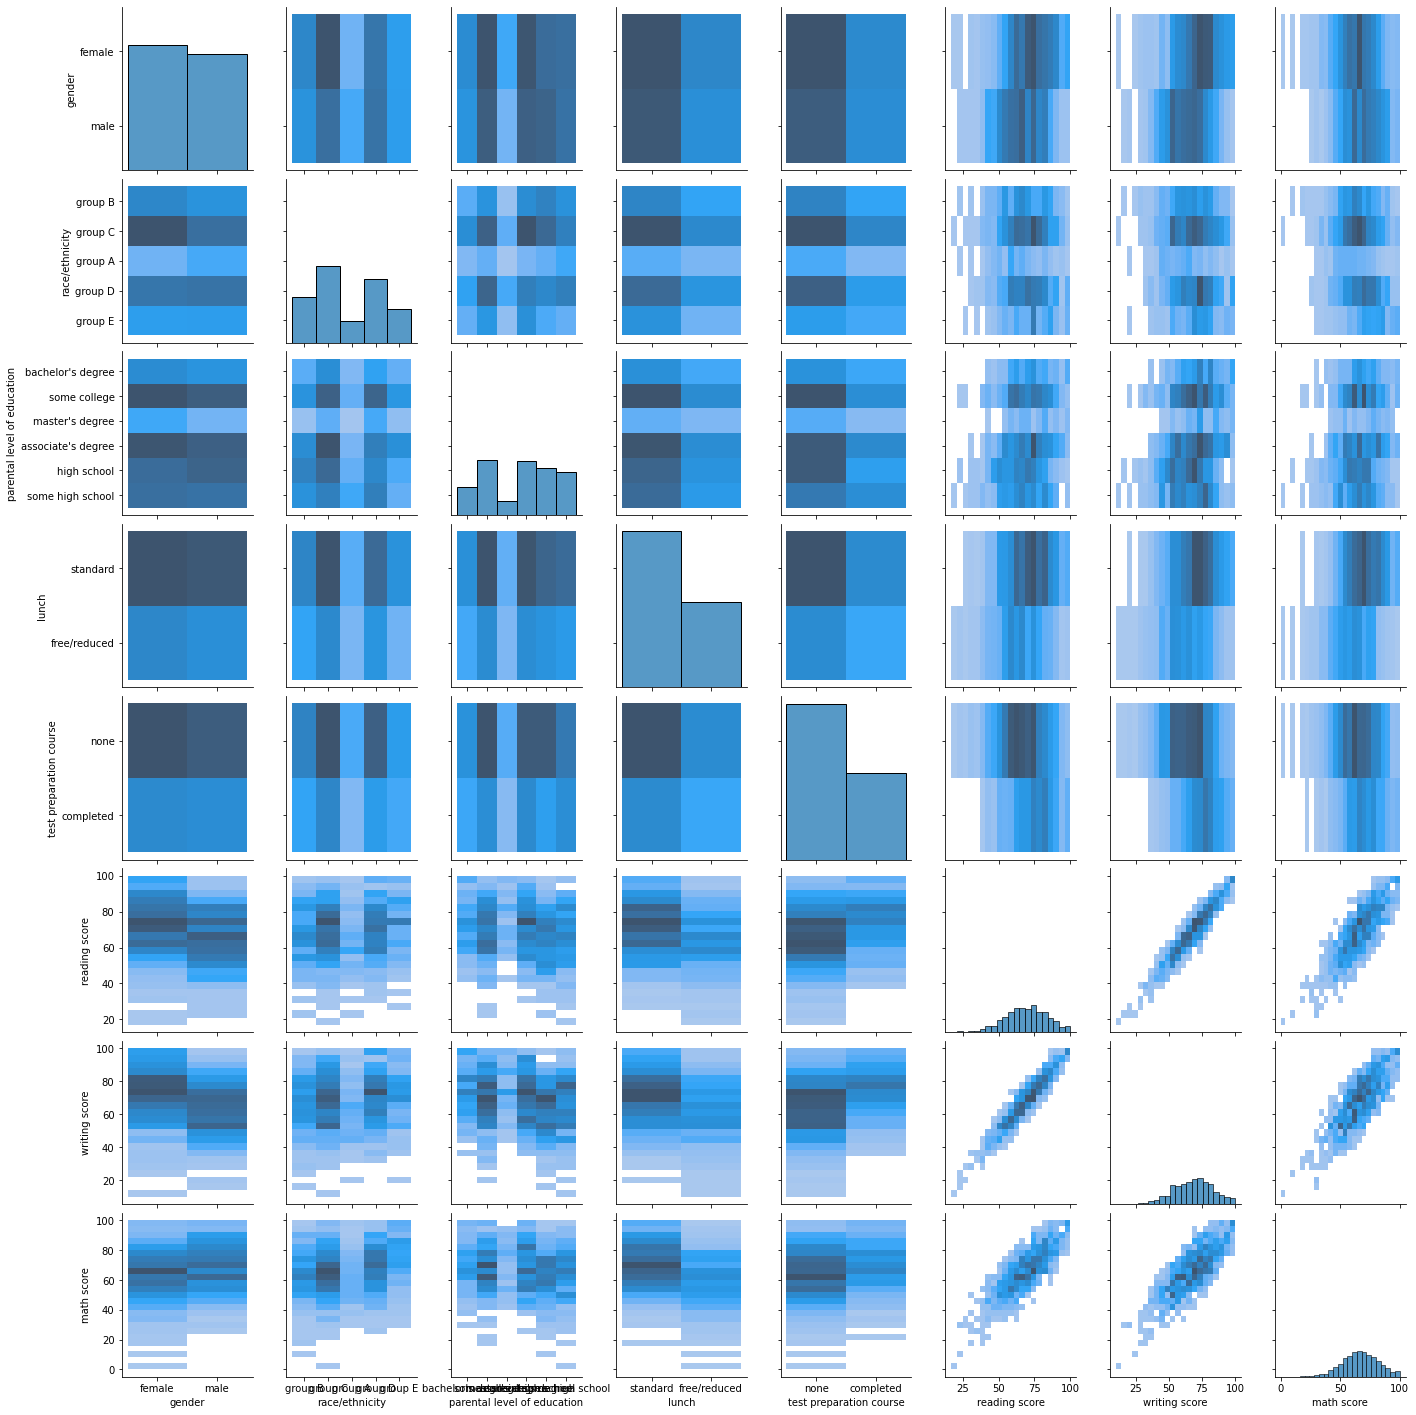

In [73]:
# visually inspect dataset
sns.pairplot(df,vars=df.columns,kind='hist')

In [53]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score',
       'math score'],
      dtype='object')

In [54]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
math score                      int64
dtype: object

In [55]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [56]:
# OrdinalEncoder multi-level ordinal category encoding (there is also LableEncoder, it is largly same but it is for responce)
t = sklearn.preprocessing.OrdinalEncoder(
    categories=[['female', 'male'],['standard','free/reduced']]).fit(df[['gender','lunch']].values)
t.transform(df[['gender','lunch']].values)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 1.]])

In [57]:
t.categories_

[array(['female', 'male'], dtype=object),
 array(['standard', 'free/reduced'], dtype=object)]

In [58]:
# OneHotEncoder multi-level category to several binary column
enc = sklearn.preprocessing.OneHotEncoder().fit(df['race/ethnicity'].values.reshape(-1, 1))
#print(enc.transform(df['race/ethnicity'].values.reshape(-1, 1)))

In [59]:
enc.categories_

[array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object)]

In [65]:
# split to train and test
train,test = sklearn.model_selection.train_test_split(df)

In [62]:
# ColumnTransformer transform whole dataframe to sklearn friendly set
X = sklearn.compose.ColumnTransformer(
    [
        ('onehotenc', sklearn.preprocessing.OneHotEncoder(), ['race/ethnicity']),
        ('category',  sklearn.preprocessing.OrdinalEncoder(
            categories=[['female', 'male'],['standard','free/reduced'],['none', 'completed']]), ['gender','lunch','test preparation course']),
        ('ordinal',  sklearn.preprocessing.OrdinalEncoder(
            categories=[[
                'some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"
            ]]), ['parental level of education']),
        ('discretizer', sklearn.preprocessing.KBinsDiscretizer(n_bins=4), ['reading score'])
        
    ], remainder='passthrough'
).fit_transform(df)


In [63]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,74.0,72.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,88.0,69.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,93.0,90.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,44.0,47.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,75.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,95.0,88.0
996,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,55.0,62.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,65.0,59.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,77.0,68.0


In [67]:
test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
499,male,group E,some college,standard,none,71,72,76
344,male,group D,some college,standard,none,73,67,79
937,female,group E,high school,free/reduced,none,58,57,57
291,male,group D,some high school,standard,none,73,70,86
991,female,group B,some high school,standard,completed,82,78,65
...,...,...,...,...,...,...,...,...
506,male,group A,high school,standard,none,70,66,68
998,female,group D,some college,standard,completed,78,77,68
539,male,group A,associate's degree,standard,completed,92,86,97
274,male,group B,some college,standard,completed,85,76,88
